In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
%matplotlib inline

In [79]:
df = pd.read_csv("GTD-Export.csv")

In [80]:
df.head(5)

,GTD ID,DATE,COUNTRY,CITY,PERPETRATOR 1,GUNCERTAIN 1,PERPETRATOR 2,GUNCERTAIN 2,PERPETRATOR 3,GUNCERTAIN 3,...,TARGET TYPE 2,TARGET TYPE 3,REGION,ATTACK TYPE 1,ATTACK TYPE 2,ATTACK TYPE 3,WEAPON TYPE 1,WEAPON TYPE 2,WEAPON TYPE 3,WEAPON TYPE 4
0,2.015020e+11,12/30/14,Pakistan,Buner district,Unknown,0,3,Unknown,Police,South Asia,...,Hostage Taking (Kidnapping),Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.015010e+11,12/27/14,Afghanistan,Saberi district,Taliban,0,NaN,NaN,NaN,NaN,...,NaN,NaN,South Asia,Bombing/Explosion,NaN,NaN,Explosives/Bombs/Dynamite,NaN,NaN,NaN
2,2.014120e+11,12/31/14,Algeria,Algiers,Unknown,0,NaN,NaN,NaN,NaN,...,NaN,NaN,Middle East & North Africa,Bombing/Explosion,NaN,NaN,Explosives/Bombs/Dynamite,NaN,NaN,NaN
3,2.014120e+11,12/30/14,Yemen,Ash Shihr,Al-Qaida in the Arabian Peninsula (AQAP),0,NaN,NaN,NaN,NaN,...,Business,NaN,Middle East & North Africa,Armed Assault,NaN,NaN,Firearms,NaN,NaN,NaN
4,2.014120e+11,12/30/14,Yemen,Ash Shihr,Al-Qaida in the Arabian Peninsula (AQAP),0,NaN,NaN,NaN,NaN,...,Business,NaN,Middle East & North Africa,Armed Assault,NaN,NaN,Firearms,NaN,NaN,NaN


In [81]:
df.columns

Index(['GTD ID', 'DATE', 'COUNTRY', 'CITY', 'PERPETRATOR 1', 'GUNCERTAIN 1',
       'PERPETRATOR 2', 'GUNCERTAIN 2', 'PERPETRATOR 3', 'GUNCERTAIN 3',
       'FATALITIES', 'INJURED', 'TARGET TYPE 1', 'TARGET TYPE 2',
       'TARGET TYPE 3', 'REGION', 'ATTACK TYPE 1', 'ATTACK TYPE 2',
       'ATTACK TYPE 3', 'WEAPON TYPE 1', 'WEAPON TYPE 2', 'WEAPON TYPE 3',
       'WEAPON TYPE 4'],
      dtype='object')

In [82]:
df_new=df[['COUNTRY','FATALITIES']]

In [83]:
df2=df_new.drop(0)

In [84]:
df2.head(10)

,COUNTRY,FATALITIES
1,Afghanistan,5
2,Algeria,0
3,Yemen,0
4,Yemen,0
5,Pakistan,1
6,Afghanistan,2
7,Afghanistan,5
8,Nigeria,Unknown
9,Nigeria,2
10,Nigeria,1


In [85]:
type(df2['FATALITIES'][1])

str

In [86]:
df2['FATALITIES'].value_counts()

0          400
1          193
2           95
3           58
Unknown     52
4           41
10          22
5           21
7           15
8           13
6           13
9           10
16           6
12           5
15           4
20           4
11           4
27           4
22           3
50           2
18           2
51           2
30           2
90           2
23           2
17           2
24           2
111          1
45           1
33           1
61           1
157          1
40           1
14           1
122          1
35           1
Police       1
65           1
21           1
25           1
47           1
26           1
13           1
19           1
36           1
150          1
31           1
Name: FATALITIES, dtype: int64

In [87]:
def to_int(x):
    if x!= "Police" and x!="Unknown":
        return int(x)
    else:
        return 0

In [88]:
df2['Fatalities']=df2['FATALITIES'].apply(to_int)

In [89]:
df2.groupby('COUNTRY')['Fatalities'].sum().sort_values(ascending=False)

COUNTRY
Iraq             935
Nigeria          825
Afghanistan      475
Syria            429
Pakistan         372
Yemen            179
Somalia          131
India            128
Sudan             87
Russia            27
United States      4
Algeria            2
Name: Fatalities, dtype: int64

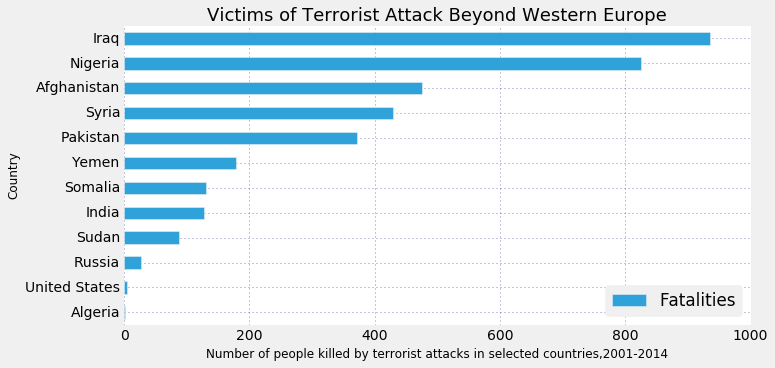

In [95]:
plt.style.use("fivethirtyeight")
fig,ax = plt.subplots(figsize=(10,5))
df2.groupby('COUNTRY')['Fatalities'].sum().sort_values().plot(kind='barh',ax=ax)
ax.set_title("Victims of Terrorist Attack Beyond Western Europe",fontsize=18)
ax.set_xlim([0,1000])
ax.grid(color='MidnightBlue',linestyle=':',linewidth=0.5)
ax.set_xlabel("Number of people killed by terrorist attacks in selected countries,2001-2014",fontsize=12)
ax.set_ylabel("Country",fontsize=12)
ax.legend(loc='lower right')
ax.set_axisbelow(True)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tick_params(
    axis='x',
    which='major',
    top='off',
    bottom='off',
    left='off',
    right='off',
    labeltop='off',
    labelbottom='on')
ax.set_axis_bgcolor("white")
plt.savefig("terrorism.pdf",transparent=True)

In [94]:
plt.savefig("terrorism.pdf",transparent=True)